In [17]:
# libraries 
from google.colab import files 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns # data visualization library 
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
seed = 7

# New Section

In [18]:
!pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from sklearn.ensemble import RandomForestRegressor
from rfpimp import permutation_importances
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [20]:
df = pd.read_csv("/content/H3K122ac_counts.txt", sep="\t", index_col=0)

In [21]:
df_T = df.T

In [22]:
def change_labels(x):
  print(x)
  if 'AD' in x:
    return 1
  return 0

In [23]:
print(df.shape)

(2240520, 29)


In [24]:
df_T = df.T
df_T.apply(lambda x: change_labels(x.name), axis=1)

start
end
Y-15T
Y-17T
Y-13A
Y-18T
Y-14A
Y-19T
Y-15A
Y-16A
O-8A
O-10T
O-6A
O-11T
O-7A
O-13T
O-14T
O-9A
O-10A
O-11A
AD-1T
AD-1A
AD-2T
AD-2A
AD-5T
AD-3A
AD-5A
AD-8T
AD-7T


start    0
end      0
Y-15T    0
Y-17T    0
Y-13A    0
Y-18T    0
Y-14A    0
Y-19T    0
Y-15A    0
Y-16A    0
O-8A     0
O-10T    0
O-6A     0
O-11T    0
O-7A     0
O-13T    0
O-14T    0
O-9A     0
O-10A    0
O-11A    0
AD-1T    1
AD-1A    1
AD-2T    1
AD-2A    1
AD-5T    1
AD-3A    1
AD-5A    1
AD-8T    1
AD-7T    1
dtype: int64

In [25]:
df_T["class"] = df_T.apply(lambda x: change_labels(x.name), axis=1)
df_T.fillna(0)




start
end
Y-15T
Y-17T
Y-13A
Y-18T
Y-14A
Y-19T
Y-15A
Y-16A
O-8A
O-10T
O-6A
O-11T
O-7A
O-13T
O-14T
O-9A
O-10A
O-11A
AD-1T
AD-1A
AD-2T
AD-2A
AD-5T
AD-3A
AD-5A
AD-8T
AD-7T


chrom,chr1,chr1,chr1,chr1,chr1,chr1,chr1,chr1,chr1,chr1,...,chrY,chrY,chrY,chrY,chrY,chrY,chrY,chrY,chrY,class
start,713810,713860,713861,713882,713885,713891,713904,713938,713944,713949,...,22738064,22738088,22738113,22738235,23764353,23764935,23765114,23765197,23765201,0
end,713860,713861,713882,713885,713891,713904,713938,713944,713949,713973,...,22738088,22738113,22738235,22738243,23764935,23765114,23765197,23765201,23765332,0
Y-15T,0,0,0,0,0,0,0,0,0,0,...,20,20,20,0,16,16,16,0,0,0
Y-17T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,20,20,0
Y-13A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Y-18T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Y-14A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Y-19T,0,0,0,0,0,0,0,0,21,21,...,0,0,0,0,0,0,0,0,0,0
Y-15A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Y-16A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_T.groupby('class').size()

class
0    20
1     9
dtype: int64

In [27]:
# Get labels for training data
Y = df_T["class"].values

# Get training data as numpy array
X = df_T.drop(['class'], axis=1).astype(float).values
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

# Split the data for cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

In [28]:
x_time_train = X_train[:, 0]
x_train = X_train[:, 1:]

In [29]:
X_train



array([[-0.27217331, -0.27217761, -0.27218027, ..., -0.2721659 ,
        -0.2721658 , -0.27216565],
       [-0.27217331, -0.27217761, -0.27218027, ..., -0.2721659 ,
        -0.2721658 , -0.27216565],
       [-0.27217331, -0.27217761, -0.2721084 , ..., -0.2721659 ,
        -0.2721658 , -0.27216565],
       ...,
       [-0.27217331, -0.27217761, -0.27218027, ..., -0.2721659 ,
        -0.2721658 , -0.27216565],
       [-0.27217331, -0.27217761, -0.27218027, ..., -0.2721659 ,
        -0.2721658 , -0.27216565],
       [-0.27217331, -0.27217761, -0.27218027, ..., -0.2721659 ,
        -0.2721658 , -0.27216565]])

In [30]:
Y_train

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [32]:
# define models and parameters
# define models and parameters
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
n_estimators = [10, 50, 100, 500, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.695767 using {'max_features': 'sqrt', 'n_estimators': 10}
Best: 0.645503 using {'max_features': 'log2', 'n_estimators': 50}


In [47]:
# random forest classifier with n_estimators=10 (default)
# without tuning clf_rf = RandomForestClassifier(random_state=43)
# with tuning
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=43, n_estimators=10, max_features="log2")     
clr_rf = clf_rf.fit(X_train,Y_train)

Accuracy is:  0.4


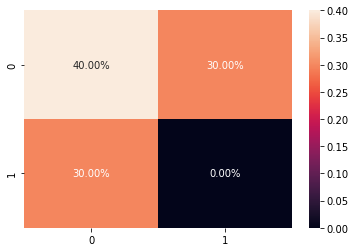

In [48]:
ac = accuracy_score(Y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
# we get the true negative, false pos, false negative and true pos 
# we see the percentage of the represented data in each quadrant 
cm = confusion_matrix(Y_test,clf_rf.predict(X_test))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%')

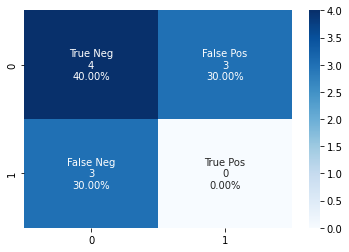

In [49]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [50]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from rfpimp import permutation_importances
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.616402 using {'max_features': 'sqrt', 'n_estimators': 10}



Summary:Random-Forest Classiefier
Precision: 0.000
Accuracy: 0.400
F1 Score: 0.000
Recall: 0.000
Roc-score: 0.286

Result for ROC-CURVE


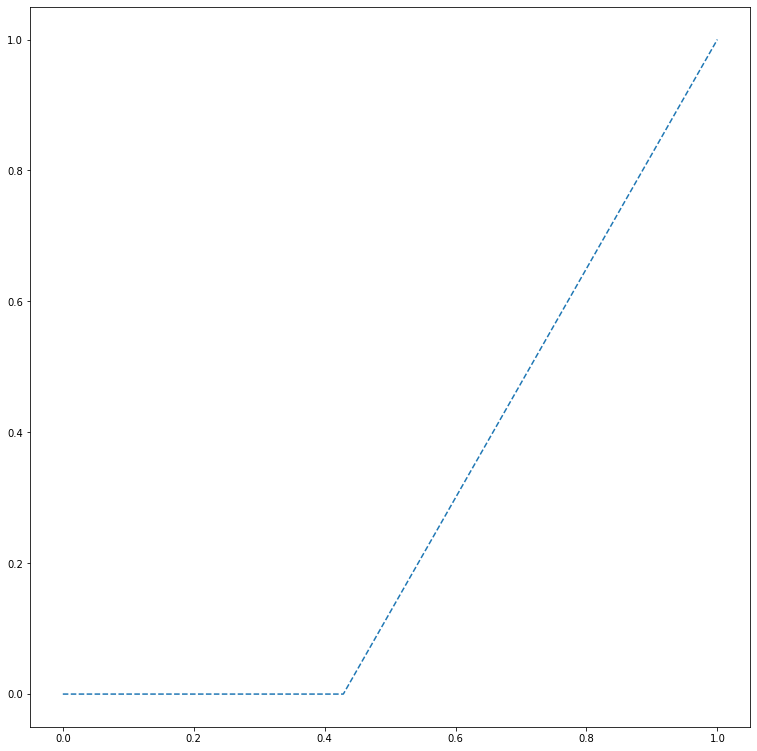

In [51]:
# Get the predictions
y_pred = clr_rf.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print()
print("Summary:Random-Forest Classiefier")
print('Precision: %.3f' % precision_score(Y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))
print('Recall: %.3f' % recall_score(Y_test, y_pred))
print('Roc-score: %.3f' % roc_auc_score(Y_test, y_pred))
print()

print("Result for ROC-CURVE")
ns_fpr, ns_tpr, _ = roc_curve(Y_test, y_pred)
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

In [52]:
# define models and parameters
model = sklearn.svm.SVC()
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto'] # for poly, rbf, sigmoid

# define grid search
grid = dict(kernel=kernel, gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.698413 using {'gamma': 'scale', 'kernel': 'poly'}


In [54]:
clf_svm = sklearn.svm.SVC(kernel=grid_result.best_params_.get('kernel'), 
                  gamma=grid_result.best_params_.get('gamma'))     
clr_svm = clf_svm.fit(X_train,Y_train)

Accuracy is:  0.7


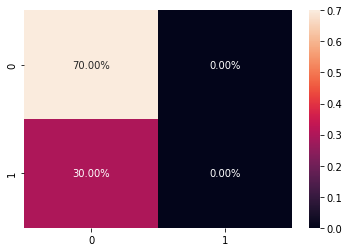

In [55]:
ac = accuracy_score(Y_test,clf_svm.predict(X_test))
print('Accuracy is: ', ac)

# we get the true negative, false pos, false negative and true pos 
# we see the percentage of the represented data in each quadrant 
cm = confusion_matrix(Y_test, clf_svm.predict(X_test))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%')

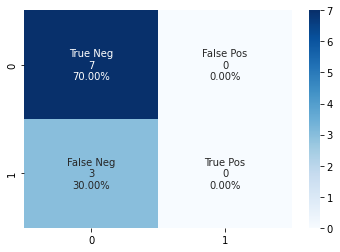

In [56]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

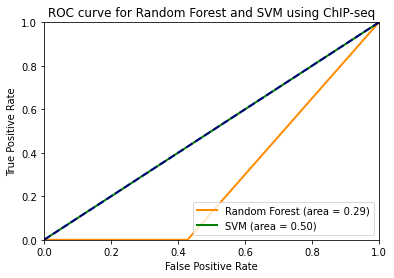

In [57]:


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score, roc_auc_score, roc_curve, auc
fpr_rf, tpr_rf, _ = roc_curve(Y_test, clf_rf.predict(X_test), pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, clf_svm.predict(X_test), pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color="darkorange", lw=2,
         label="Random Forest (area = %0.2f)" % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color="green", lw=2,
         label="SVM (area = %0.2f)" % roc_auc_svm)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Random Forest and SVM using ChIP-seq")
plt.legend(loc="lower right")
plt.show()




Summary: Support Vector Machine
Precision: 0.000
Accuracy: 0.700
F1 Score: 0.000
Recall: 0.000
Roc-score: 0.500

Result for ROC-CURVE


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


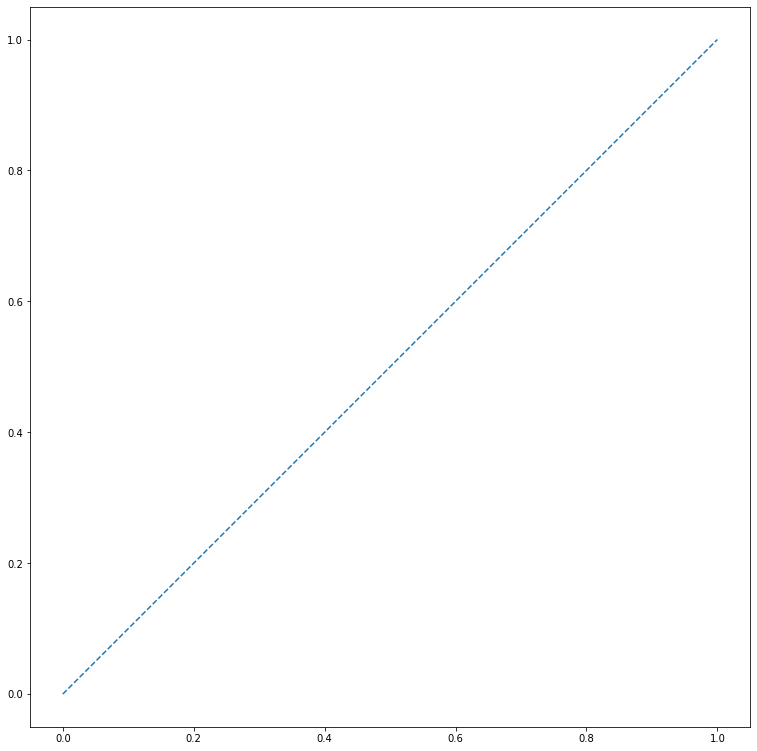

In [58]:
# Get the predictions
y_pred = clr_svm.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print()
print("Summary: Support Vector Machine")
print('Precision: %.3f' % precision_score(Y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))
print('Recall: %.3f' % recall_score(Y_test, y_pred))
print('Roc-score: %.3f' % roc_auc_score(Y_test, y_pred))
print()

print("Result for ROC-CURVE")
ns_fpr, ns_tpr, _ = roc_curve(Y_test, y_pred)
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

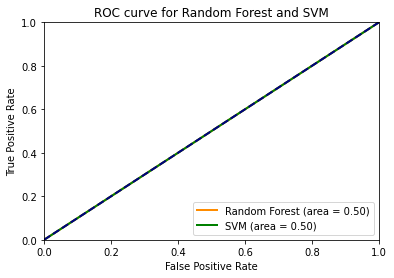

In [46]:
fpr_rf, tpr_rf, _ = roc_curve(Y_test, clf_rf.predict(X_test), pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, clf_svm.predict(X_test), pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color="darkorange", lw=2,
         label="Random Forest (area = %0.2f)" % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color="green", lw=2,
         label="SVM (area = %0.2f)" % roc_auc_svm)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Random Forest and SVM")
plt.legend(loc="lower right")
plt.show()